### Adult Income Data

Data collected on over 48,000 adults including age, race, gender, weekly hours worked, education and 9 other variables.

#### Initial Questions:
 - What strong correlations exist between income and personal info?
 - Are there any unexpected correlations?
 - Is it possible to predict income level based off of demographic information?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

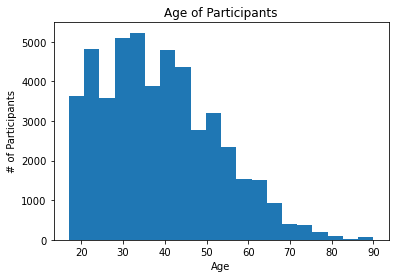

In [6]:
#Look at age spread of subjects
plt.hist(df.age, bins = 20)
plt.ylabel('# of Participants')
plt.xlabel('Age')
plt.title('Age of Participants')
df.age.describe()

<AxesSubplot:xlabel='income', ylabel='count'>

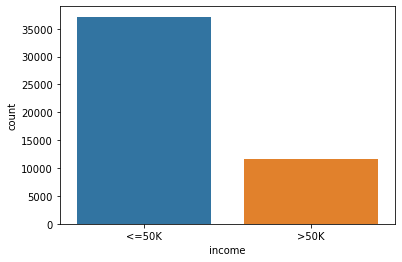

In [7]:
#count plot of income classes 
sns.countplot(x = 'income',data = df)

In [8]:
# just using age so can see full count of income classes
df.groupby(['income'])[['age']].count()

,age
income,
<=50K,37155
>50K,11687


In [9]:
# will look at proportion of income levels to determine if model is predicting well or being influenced by the
# discrepency in income counts
income_ratio = (11687/37155)
print(income_ratio)

0.3145471672722379


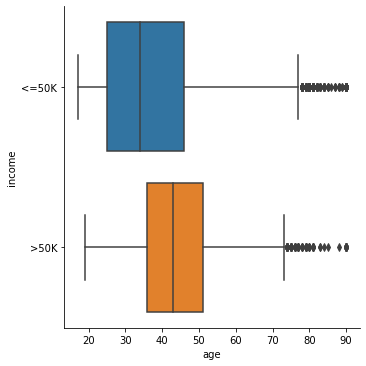

In [10]:
sns.catplot(x = 'age', y = 'income', kind = 'box', data = df)

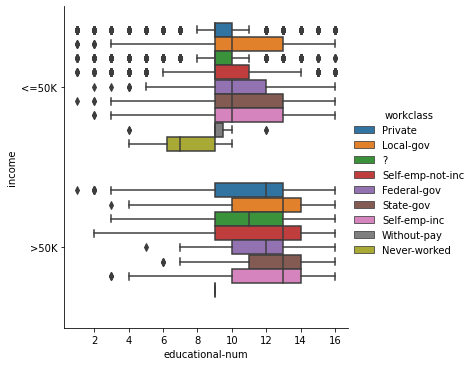

In [11]:
sns.catplot(x = 'educational-num', y = 'income', hue = 'workclass', kind = 'box', data = df)

In [72]:
#dfun50 = df.loc[(df.income == '<=50K')]
#dfov50 = df.loc[(df.income == '>50K')]
#dfun50.head()

#grouped = df.groupby(df.income)
#dfun50 = grouped.get_group("<=50K")
#dfun50
#print(grouped)
dfun50 = df[df['income'] == '<=50K']
dfov50 = df[df['income'] == '>50K']
dfun50.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income


In [14]:
df0 = df
df0['workclass'] = df0['workclass'].map({'Private':0, 'Self-emp-not-inc':1, 'Local-gov':2, '?':3, 'State-gov':4, 'Self-emp-inc':5, 'Federal-gov':6, 'Without-pay':7, 'Never-worked':8})
df0['marital-status'] = df0['marital-status'].map({'Married-civ-spouse':0, 'Never-married':1, 'Divorced':2, 'Separated':3, 'Widowed':4, 'Married-spouse-absent':5, 'Married-AF-spouse':6})
df0['occupation'] = df0['occupation'].map({'Prof-specialty':0, 'Craft-repair':1, 'Exec-managerial':2, 'Adm-clerical':3, 'Sales':4, 'Other-service':5, 'Machine-op-inspct':6, '?':7, 'Transport-moving':8, 'Handlers-cleaners':9, 'Farming-fishing':10, 'Tech-support':11, 'Protective-serv':12, 'Priv-house-serv':13, 'Armed-Forces':14})
df0['relationship'] = df0['relationship'].map({'Husband':0, 'Wife':1, 'Not-in-family':2, 'Own-child':3, 'Unmarried':4, 'Other-relative':5})
df0['race'] = df0['race'].map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
df0['gender'] = df0['gender'].map({'Male':0, "Female":1})
df0['income'] = df0['income'].map({'<=50K':0, ">50K":1})
df0.loc[df0['native-country'] == 'United-States', 'native-country'] = 1
df0.loc[df0['native-country'] != 1, 'native-country'] = 0
df0 = df0.drop(['fnlwgt', 'education'], axis = 1)
df0 = df0.drop(['native-country'], axis = 1)
df0.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,0,7,1,6,3,1,0,0,0,40,0
1,38,0,9,0,10,0,0,0,0,0,50,0
2,28,2,12,0,12,0,0,0,0,0,40,1
3,44,0,10,0,6,0,1,0,7688,0,40,1
4,18,3,10,1,7,3,0,1,0,0,30,0


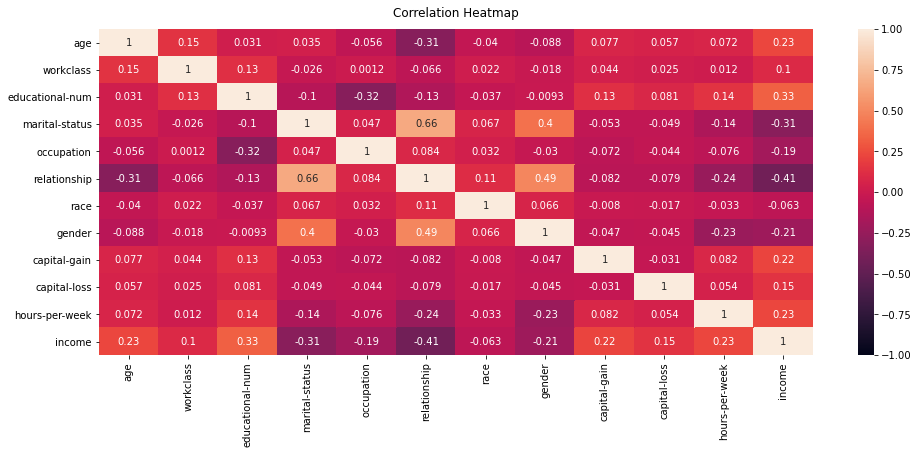

In [15]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df0.corr(), vmin = -1, vmax = 1, annot = True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [27]:
df = df.drop(['fnlwgt', 'education'], axis = 1)
df = df.drop(['native-country'], axis = 1)

In [28]:
# start using dummy variables for models
df1 = pd.get_dummies(df)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   educational-num  48842 non-null  int64
 3   marital-status   48842 non-null  int64
 4   occupation       48842 non-null  int64
 5   relationship     48842 non-null  int64
 6   race             48842 non-null  int64
 7   gender           48842 non-null  int64
 8   capital-gain     48842 non-null  int64
 9   capital-loss     48842 non-null  int64
 10  hours-per-week   48842 non-null  int64
 11  income           48842 non-null  int64
dtypes: int64(12)
memory usage: 4.5 MB


In [29]:
y = df1['income'] 
X_scaled = StandardScaler().fit_transform(df1.drop(['income'], axis = 1))
X_scaled

array([[-0.99512893, -0.54966514, -1.19725891, ..., -0.14480353,
        -0.2171271 , -0.03408696],
       [-0.04694151, -0.54966514, -0.41933527, ..., -0.14480353,
        -0.2171271 ,  0.77292975],
       [-0.77631645,  0.67764268,  0.74755018, ..., -0.14480353,
        -0.2171271 , -0.03408696],
       ...,
       [ 1.41180837, -0.54966514, -0.41933527, ..., -0.14480353,
        -0.2171271 , -0.03408696],
       [-1.21394141, -0.54966514, -0.41933527, ..., -0.14480353,
        -0.2171271 , -1.64812038],
       [ 0.97418341,  2.5186044 , -0.41933527, ...,  1.87131501,
        -0.2171271 , -0.03408696]])

In [30]:
#y = df0['income']
X = df1.drop(['income'], axis = 1)

In [31]:
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
0,-0.995129,-0.549665,-1.197259,0.101107,0.563611,0.910294,1.246343,-0.70422,-0.144804,-0.217127,-0.034087
1,-0.046942,-0.549665,-0.419335,-0.807497,1.786217,-1.043845,-0.352026,-0.70422,-0.144804,-0.217127,0.772930
2,-0.776316,0.677643,0.747550,-0.807497,2.397520,-1.043845,-0.352026,-0.70422,-0.144804,-0.217127,-0.034087
3,0.390683,-0.549665,-0.030373,-0.807497,0.563611,-1.043845,1.246343,-0.70422,0.886874,-0.217127,-0.034087
4,-1.505691,1.291297,-0.030373,0.101107,0.869262,0.910294,-0.352026,1.42001,-0.144804,-0.217127,-0.841104


In [41]:
print("Average age of participant:", df['age'].mean())
print("Average age of participant making under 50k:" , dfun50['age'].mean())
print("Average age of participant making over 50k:" , dfov50['age'].mean())

Average age of participant: 38.64358543876172
Average age of participant making under 50k: nan
Average age of participant making over 50k: nan


In [22]:
print("Average years of education of participant making under 50k:" , df.un50['educational-num'].mean())
print("Average years of education of participant making over 50k:" , df.ab50['educational-num'].mean())

Average years of education of participant making under 50k: 9.598492800430629
Average years of education of participant making over 50k: 11.602806537178061


## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df,y, test_size = 0.25, random_state = 42)

In [34]:
logit = LogisticRegression(C = 1.0)
logit.fit(X_train,y_train)
y_pred = logit.predict(X_test)
con_mat = confusion_matrix(y_pred, y_test)
print(con_mat)
print('Accuracy Score: ', accuracy_score(y_test,y_pred))

[[8755 1272]
 [ 599 1585]]
Accuracy Score:  0.8467774957005978


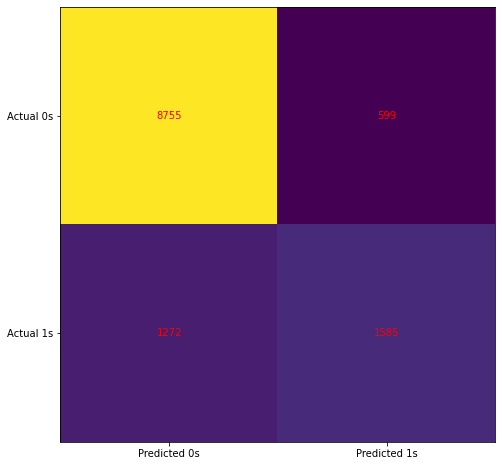

In [35]:
cm = confusion_matrix(y_test, logit.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [36]:
print(classification_report(y_test, logit.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9354
           1       0.73      0.55      0.63      2857

    accuracy                           0.85     12211
   macro avg       0.80      0.75      0.77     12211
weighted avg       0.84      0.85      0.84     12211



In [37]:
logit.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [40]:
%%time
logit_params = {'C' : np.logspace(-4,4,20), 'n_jobs': [-1,1,4,6]} 
logit_grid = GridSearchCV(logit, logit_params, cv = 5, scoring = 'accuracy') 
logit_grid.fit(X_train, y_train)

print(logit_grid.best_params_)

print(logit_grid.best_estimator_)

{'C': 4.281332398719396, 'n_jobs': -1}
LogisticRegression(C=4.281332398719396, n_jobs=-1)
CPU times: user 1min 6s, sys: 2.69 s, total: 1min 9s
Wall time: 3min 25s


In [43]:
logit2 = LogisticRegression(C = 4.281332398719396, n_jobs= -1)
logit2.fit(X_train,y_train)
y_pred = logit2.predict(X_test)
con_mat = confusion_matrix(y_pred, y_test)
print(con_mat)
print('Accuracy Score: ', accuracy_score(y_test,y_pred))

[[8755 1272]
 [ 599 1585]]
Accuracy Score:  0.8467774957005978


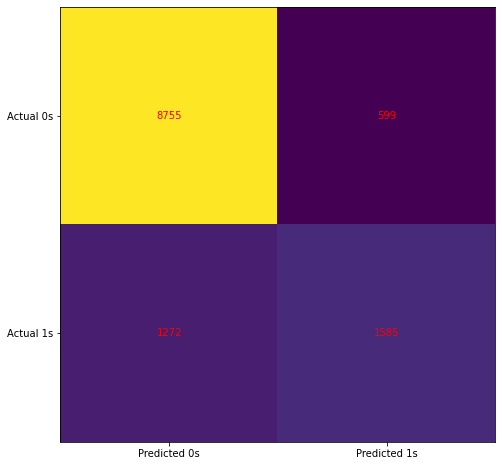

In [44]:
cm = confusion_matrix(y_test, logit2.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [45]:
print(classification_report(y_test, logit2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9354
           1       0.73      0.55      0.63      2857

    accuracy                           0.85     12211
   macro avg       0.80      0.75      0.77     12211
weighted avg       0.84      0.85      0.84     12211



# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [47]:
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
print(y_pred[:5]) 
print(y_test[:5]) 
print('Accuracy Score:', accuracy_score(y_test, y_pred))

[0 0 1 0 1]
7762     0
23881    0
30507    1
28911    0
19484    0
Name: income, dtype: int64
Accuracy Score: 0.8418638932110393


In [48]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 25) 
#knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv = kf, scoring = 'accuracy')
print('Accuracy Scores: ', scores) 
print('Average Accuracy Score', np.mean(scores))

Accuracy Scores:  [0.85095711 0.85034292 0.85636773 0.84817772 0.85053235]
Average Accuracy Score 0.8512755671574384


In [49]:
%%time
knn_params = {'n_neighbors': np.arange(1, 51)} 
knn_grid = GridSearchCV(knn, knn_params, cv = 5, scoring = 'accuracy') 
knn_grid.fit(X_train, y_train)

print(knn_grid.best_params_)

print(knn_grid.best_estimator_)

{'n_neighbors': 16}
KNeighborsClassifier(n_neighbors=16)
CPU times: user 12min 18s, sys: 3.39 s, total: 12min 21s
Wall time: 12min 29s


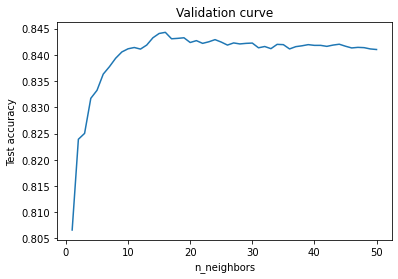

In [50]:
results_df = pd.DataFrame(knn_grid.cv_results_)

plt.plot(results_df['param_n_neighbors'], results_df['mean_test_score'])

plt.xlabel('n_neighbors')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

In [51]:
%%time
knn_params = {'p': np.linspace(1, 10, num = 20)} 
knn_grid = GridSearchCV(knn, knn_params, cv = 5, scoring = 'accuracy') 
knn_grid.fit(X_train, y_train) 

print(knn_grid.best_params_)

print(knn_grid.best_estimator_)

{'p': 1.9473684210526314}
KNeighborsClassifier(p=1.9473684210526314)
CPU times: user 18min 9s, sys: 2.62 s, total: 18min 12s
Wall time: 18min 19s


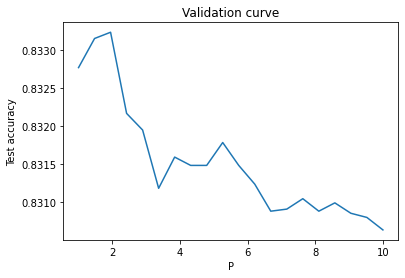

In [52]:
results_df = pd.DataFrame(knn_grid.cv_results_)
#print(results_df)
plt.plot(results_df['param_p'], results_df['mean_test_score'])

plt.xlabel('P')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

### Tuned Model: KNN

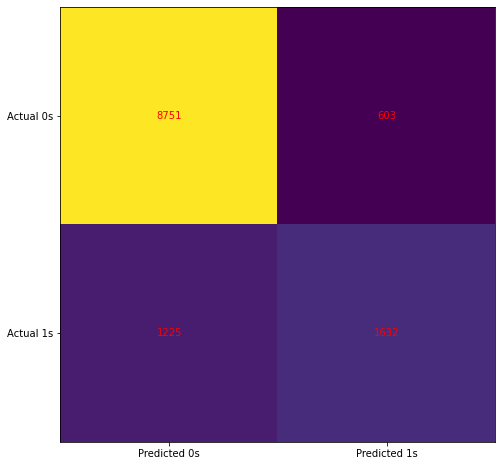

In [53]:
knn = KNeighborsClassifier(n_neighbors = 16, p=1.9473684210526314)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, knn.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Random Forrest

In [54]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

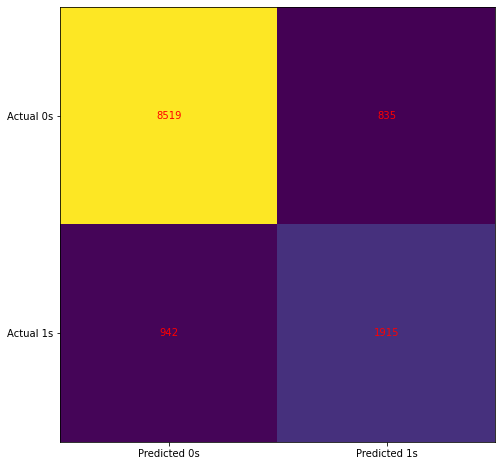

In [56]:
rfc = RandomForestClassifier(class_weight = 'balanced')
model = rfc.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [72]:
rfc.get_params().keys()


#numpy random binomial - make proportion same as data - use to measure performance of model 

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [57]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      9354
           1       0.70      0.67      0.68      2857

    accuracy                           0.85     12211
   macro avg       0.80      0.79      0.79     12211
weighted avg       0.85      0.85      0.85     12211



In [58]:
%%time
rfc_params = {'max_depth': [3,5,7,10, 15, 17, 20],
             'n_estimators' : [30,50,75,100,200]} 
rfc_grid = GridSearchCV(rfc, rfc_params, cv = 5, scoring = 'accuracy') 
rfc_grid.fit(X_train, y_train) 

print(rfc_grid.best_params_)

print(rfc_grid.best_estimator_)

{'max_depth': 20, 'n_estimators': 200}
RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200)
CPU times: user 3min 52s, sys: 3.14 s, total: 3min 55s
Wall time: 3min 56s


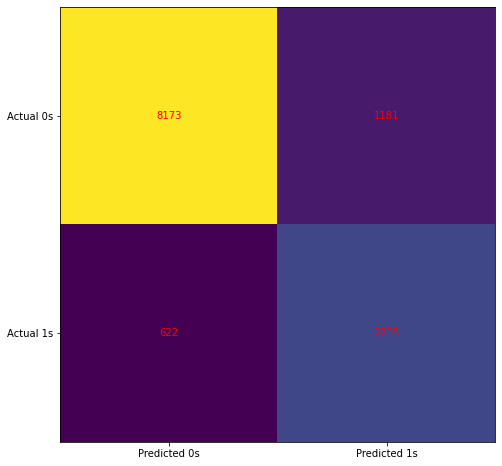

In [59]:
rfc = RandomForestClassifier(class_weight = 'balanced', max_depth = 20, n_estimators = 200)
model = rfc.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [60]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      9354
           1       0.65      0.78      0.71      2857

    accuracy                           0.85     12211
   macro avg       0.79      0.83      0.81     12211
weighted avg       0.86      0.85      0.86     12211



In [73]:
# comparing if RF model is better than a binary numpy array with the ratio created above: income_ratio
s = np.random.binomial(48842, income_ratio, 12211)
print(s)

[15548 15197 15331 ... 15395 15298 15190]


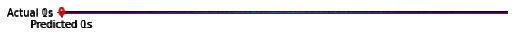

In [75]:
cm = confusion_matrix(y_test, s)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

age : 0, Score: 0.10892
workclass : 1, Score: 0.03179
educational-num : 2, Score: 0.15436
marital-status : 3, Score: 0.12234
occupation : 4, Score: 0.08641
relationship : 5, Score: 0.17605
race : 6, Score: 0.01244
gender : 7, Score: 0.01267
capital-gain : 8, Score: 0.16791
capital-loss : 9, Score: 0.05606
hours-per-week : 10, Score: 0.07105


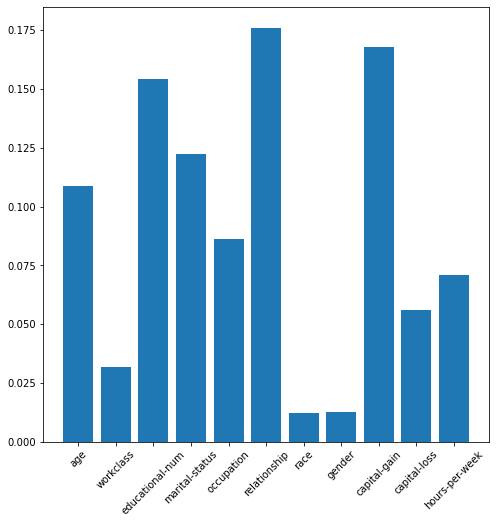

In [110]:
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(X_test.columns[i],': %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10], labels = X_test.columns, rotation = 45)
plt.rcParams["figure.figsize"] = (8,8)
plt.show()